In [1]:
import matplotlib.pyplot as plt
import copy
import random as r
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib


#Leitura do arquivo com os pontos de expressão gênica
arquivo = open("./../Data/GRN10_DATA.txt", 'r')

x = []
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []

for linha in arquivo:
    elementos = linha.split()
    x.append(float(elementos[0].strip()))
    A.append(float(elementos[1].strip()))
    B.append(float(elementos[2].strip()))
    C.append(float(elementos[3].strip()))
    D.append(float(elementos[4].strip()))
    E.append(float(elementos[5].strip()))
    F.append(float(elementos[6].strip()))
    G.append(float(elementos[7].strip()))
    H.append(float(elementos[8].strip()))
    I.append(float(elementos[9].strip()))
    J.append(float(elementos[10].strip()))


#Valores máximos da expressão gênica de cada espécie
maximo_A = max(A)
maximo_B = max(B)
maximo_C = max(C)
maximo_D = max(D)
maximo_E = max(E)
maximo_F = max(F)
maximo_G = max(G)
maximo_H = max(H)
maximo_I = max(I)
maximo_J = max(J)


#Condições iniciais da EDO
Y0 = []
Y0.append(A[0])
Y0.append(B[0])
Y0.append(C[0])
Y0.append(D[0])
Y0.append(E[0])
Y0.append(F[0])
Y0.append(G[0])
Y0.append(H[0])
Y0.append(I[0])
Y0.append(J[0])

#Configuração do Indivíduo e range de parâmetros
IND_SIZE = 40#Tamanho do indivíduo (quantidade de coeficientes)
MIN_K = 0.1#Menor valor que K pode assumir
MAX_K = 1#Maior valor que K pode assumir
MIN_N = 1#Menor valor que N pode assumir
MAX_N = 25#Maior valor que N pode assumir
MIN_TAU = 0.1#Menor valor que TAU pode assumir
MAX_TAU = 5#Maior valor que TAU pode assumir
MIN_STRATEGY = 0.1 #Menor valor que a estratégia pode assumir
MAX_STRATEGY = 10#Maior valor que a estratégia pode assumir
TAU_SIZE = 10
N_SIZE = 15
K_SIZE = 15
#COMPOSIÇÃO DO INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]


dobra_pontos = copy.deepcopy(x)
POPULACAO = []
APTIDAO = []


LAMBDA_FILHOS = []
APTIDAO_FILHOS = []


#Função de integração numérica - cada ydot é uma EDO de uma espécie 
def twoBody(y, t, tauA, kAJ, nAJ, tauB, kBE, nBE, tauC, kCB, nCB, kCF, nCF, kCA, nCA, tauD, kDF, nDF, tauE, kEJ, nEJ, tauF, kFA, nFA, tauG, kGB, nGB, kGF, nGF, kGA, nGA, tauH, kHF, nHF, tauI, kIG, nIG, kIH, nIH, tauJ, kJI, nJI):
    ydot = np.empty((10,))

    ydot[0] = ((1-pow(y[9]/maximo_J,nAJ)/(pow(y[9]/maximo_J,nAJ)+pow(kAJ,nAJ)))-(y[0]/maximo_A)) / tauA

    ydot[1] = (pow(y[4]/maximo_E,nBE)/(pow(y[4]/maximo_E,nBE)+pow(kBE,nBE))-(y[1]/maximo_B)) / tauB

    ydot[2] = (pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB))*(1-pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF)))*(1-pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA)))+(1-pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB)))*pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF))*(1-pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA)))+(1-pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB)))*(1-pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF)))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))+pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB))*(1-pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF)))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))+(1-pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB)))*pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))+pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB))*pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))-(y[2]/maximo_C)) / tauC

    ydot[3] = (pow(y[5]/maximo_F,nDF)/(pow(y[4]/maximo_E,nDF)+pow(kDF,nDF))-(y[3]/maximo_D)) / tauD

    ydot[4] = (1-pow(y[9]/maximo_J,nEJ)/(pow(y[9]/maximo_J,nEJ)+pow(kEJ,nEJ))-(y[4]/maximo_E)) / tauE

    ydot[5] = (pow(y[0]/maximo_A,nFA)/(pow(y[0]/maximo_A,nFA)+pow(kFA,nFA))-(y[5]/maximo_F)) / tauF

    ydot[6] = (pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB))*(1-pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF)))*(1-pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA)))+(1-pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB)))*pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF))*(1-pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA)))+(1-pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB)))*(1-pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF)))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))+pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB))*(1-pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF)))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))+(1-pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB)))*pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))+pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB))*pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))-(y[6]/maximo_G)) / tauG

    ydot[7] = (pow(y[5]/maximo_F,nHF)/(pow(y[5]/maximo_F,nHF)+pow(kHF,nHF))-(y[7]/maximo_H)) / tauH

    ydot[8] = (pow(y[6]/maximo_G,nIG)/(pow(y[6]/maximo_G,nIG)+pow(kIG,nIG))*pow(y[7]/maximo_H,nIH)/(pow(y[7]/maximo_H,nIH)+pow(kIH,nIH))-(y[8]/maximo_I)) / tauI

    ydot[9] = (pow(y[8]/maximo_I,nJI)/(pow(y[8]/maximo_I,nJI)+pow(kJI,nJI))-(y[9]/maximo_J)) / tauJ

    return ydot

def organiza_pontos(solucao):
    pA = []
    pB = []
    pC = []
    pD = []
    pE = []
    pF = []
    pG = []
    pH = []
    pI = []
    pJ = []
    for pontos in range(len(solucao)):
        if pontos % 2 == 0 or pontos % 2 == 1:
            pA.append(solucao[pontos][0])
            pB.append(solucao[pontos][1])
            pC.append(solucao[pontos][2])
            pD.append(solucao[pontos][3])
            pE.append(solucao[pontos][4])
            pF.append(solucao[pontos][5])
            pG.append(solucao[pontos][6])
            pH.append(solucao[pontos][7])
            pI.append(solucao[pontos][8])
            pJ.append(solucao[pontos][9])
    return pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ



def calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ):
    difA = 0
    difB = 0
    difC = 0
    difD = 0
    difE = 0
    difF = 0
    difG = 0
    difH = 0
    difI = 0
    difJ = 0
    pAl = []
    pBl = []
    pCl = []
    pDl = []
    pEl = []
    pFl = []
    pGl = []
    pHl = []
    pIl = []
    pJl = []
     
    for elemento in range(len(pA)):
        dif = abs(A[elemento] - pA[elemento])
        difA += dif
    for elemento in range(len(pB)):
        dif = abs(B[elemento] - pB[elemento])
        difB += dif
    for elemento in range(len(pC)):
        dif = abs(C[elemento] - pC[elemento])
        difC += dif
    for elemento in range(len(pD)):
        dif = abs(D[elemento] - pD[elemento])
        difD += dif
    for elemento in range(len(pE)):
        dif = abs(E[elemento] - pE[elemento])
        difE += dif
    for elemento in range(len(pF)):
        dif = abs(F[elemento] - pF[elemento])
        difF += dif
    for elemento in range(len(pG)):
        dif = abs(G[elemento] - pG[elemento])
        difG += dif
    for elemento in range(len(pH)):
        dif = abs(H[elemento] - pH[elemento])
        difH += dif
    for elemento in range(len(pI)):
        dif = abs(I[elemento] - pI[elemento])
        difI += dif
    for elemento in range(len(pJ)):
        dif = abs(J[elemento] - pJ[elemento])
        difJ += dif        
    
    difTotal = difA + difB + difC + difD + difE + difF + difG + difH + difI + difJ

    return difTotal


def cria_individuo(ind_size, tau_size, n_size, k_size, min_tau, max_tau, min_n, max_n, min_k, max_k, min_strategy, max_strategy):
    ind = []
    for i in range(tau_size):
        ind.append(r.uniform(min_tau, max_tau))
    for i in range(k_size):
        ind.append(r.uniform(min_k, max_k))
    for i in range(n_size):
        ind.append(r.uniform(min_n, max_n))
    for i in range(ind_size):
        ind.append(r.uniform(min_strategy, max_strategy))
    return ind


def mutESLogNormal(ind, c, indpb):
    size = IND_SIZE
    t = c / math.sqrt(2. * math.sqrt(size))
    t0 = c / math.sqrt(2. * size)
    n = r.gauss(0, 1)
    t0_n = t0 * n
    for indx in range(size):
        #INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]
        if r.random() < indpb:
            if indx == 0 or indx == 1 or indx == 2 or indx == 3 or indx == 4 or indx == 5 or indx == 6 or indx == 7 or indx == 8 or indx == 9: #EH TAU
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                while ind[indx] < MIN_TAU or ind[indx] > MAX_TAU:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    
            if indx == 10 or indx == 11 or indx == 12 or indx == 13 or indx == 14 or indx == 15 or indx == 16 or indx == 17 or indx == 18 or indx == 19 or indx == 20 or indx == 21 or indx == 22 or indx == 23 or indx == 24: #EH K
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))                
                while ind[indx] < MIN_K or ind[indx] > MAX_K:
                    #print("entrou restrição K")
                    #print(ind[indx])
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    #print("modificação K")
                    #print(ind[indx])
                
            if indx == 25 or indx == 26 or indx == 27 or indx == 28 or indx == 29 or indx == 30 or indx == 31 or indx == 32 or indx == 33 or indx == 34 or indx == 35 or indx == 36 or indx == 37 or indx == 38 or indx == 39: #EH N
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])                
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))                
                while ind[indx] < MIN_N or ind[indx] > MAX_N:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)                        
    return ind

def varOr(populacao, lambda_f):
    offspring = []
    for descendencia in range(lambda_f):
        ind = copy.deepcopy(r.choice(populacao))
        ind_mutado = mutESLogNormal(ind, 1, 0.03)
        offspring.append(ind_mutado)
    return offspring
    
def selRandom(individuals, k):
    selecionados = []
    for i in range(k):
        selecionados.append(r.choice(individuals))
    return selecionados

def selTournament(individuals, k, tournsize):
    chosen = []
    chosen_apt = []
    for i in range(k):
        aspirants = selRandom(individuals, tournsize)
        aptidoes = []
        for individuos in range(len(aspirants)):
            individuo_atual = aspirants[individuos]
            for descendencias in range(len(individuals)):
                if individuo_atual == individuals[descendencias]:
                    aptidoes.append(APTIDAO_FILHOS[descendencias])
                    break
        menor_erro = min(aptidoes)
        chosen_apt.append(menor_erro)
        for j in range(len(aptidoes)):
            if aptidoes[j] == menor_erro:
                indice_menor_erro = j
        #print(aptidoes)
        #print(indice_menor_erro)
        chosen.append(aspirants[indice_menor_erro])
    return chosen, chosen_apt     
    
def main():
    r.seed(2)
    MU, LAMBDA = 10, 50
    for qtd_progenitores in range(MU):
        POPULACAO.append(cria_individuo(IND_SIZE, TAU_SIZE, N_SIZE, K_SIZE, MIN_TAU, MAX_TAU, MIN_N, MAX_N, MIN_K, MAX_K, MIN_STRATEGY, MAX_STRATEGY))
    for qtd_progenitores in range(MU):
        #INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]
        ind_atual = POPULACAO[qtd_progenitores]
        tauA = ind_atual[0]
        tauB = ind_atual[1]
        tauC = ind_atual[2]
        tauD = ind_atual[3]
        tauE = ind_atual[4]
        tauF = ind_atual[5]
        tauG = ind_atual[6]
        tauH = ind_atual[7]
        tauI = ind_atual[8]
        tauJ = ind_atual[9]
        kAJ = ind_atual[10]
        kBE = ind_atual[11]
        kCB = ind_atual[12]
        kCF = ind_atual[13]
        kCA = ind_atual[14]
        kDF = ind_atual[15]
        kEJ = ind_atual[16]
        kFA = ind_atual[17]
        kGB = ind_atual[18]
        kGF = ind_atual[19]
        kGA = ind_atual[20]
        kHF = ind_atual[21]
        kIG = ind_atual[22]
        kIH = ind_atual[23]
        kJI = ind_atual[24]
        nAJ = ind_atual[25]
        nBE = ind_atual[26]
        nCB = ind_atual[27]
        nCF = ind_atual[28]
        nCA = ind_atual[29]
        nDF = ind_atual[30]
        nEJ = ind_atual[31]
        nFA = ind_atual[32]
        nGB = ind_atual[33]
        nGF = ind_atual[34]
        nGA = ind_atual[35]
        nHF = ind_atual[36]
        nIG = ind_atual[37]
        nIH = ind_atual[38]
        nJI = ind_atual[39]
        
        solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
        pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)
        APTIDAO.append(calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ))

    for gen in range(10000): #Início do processo geracional
        #Varia Populacao (varOr)
        offspring = varOr(POPULACAO, LAMBDA)
        #Avalia Descendência
        APTIDAO_FILHOS.clear()
        for qtd_descendencia in range(LAMBDA):
            ind_atual = offspring[qtd_descendencia]
            tauA = ind_atual[0]
            tauB = ind_atual[1]
            tauC = ind_atual[2]
            tauD = ind_atual[3]
            tauE = ind_atual[4]
            tauF = ind_atual[5]
            tauG = ind_atual[6]
            tauH = ind_atual[7]
            tauI = ind_atual[8]
            tauJ = ind_atual[9]
            kAJ = ind_atual[10]
            kBE = ind_atual[11]
            kCB = ind_atual[12]
            kCF = ind_atual[13]
            kCA = ind_atual[14]
            kDF = ind_atual[15]
            kEJ = ind_atual[16]
            kFA = ind_atual[17]
            kGB = ind_atual[18]
            kGF = ind_atual[19]
            kGA = ind_atual[20]
            kHF = ind_atual[21]
            kIG = ind_atual[22]
            kIH = ind_atual[23]
            kJI = ind_atual[24]
            nAJ = ind_atual[25]
            nBE = ind_atual[26]
            nCB = ind_atual[27]
            nCF = ind_atual[28]
            nCA = ind_atual[29]
            nDF = ind_atual[30]
            nEJ = ind_atual[31]
            nFA = ind_atual[32]
            nGB = ind_atual[33]
            nGF = ind_atual[34]
            nGA = ind_atual[35]
            nHF = ind_atual[36]
            nIG = ind_atual[37]
            nIH = ind_atual[38]
            nJI = ind_atual[39]
            
            solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
            pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)
            diferenca = calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ)
            if math.isnan(diferenca):
                print("AQUI")
                print(kA)
                print(kB)
                print(kC)
                print(kD)
                print(kE)
                print("------- TAU")
                print(tauA)
                print(tauB)
                print(tauC)
                print(tauD)
                print(tauE)
                print("------- N")
                print(nA)
                print(nB)
                print(nC)
                print(nD)
                print(nE)
                print("------- Ps")
                print(pA)
                print(pB)
                print(pC)
                print(pD)
                print(pE)
            else:
                APTIDAO_FILHOS.append(diferenca)
        menor_valor = min(APTIDAO)
        for item in range(len(APTIDAO)):
            if menor_valor == APTIDAO[item]:
                indice_menor = item                
        #Seleciona população para a geração seguinte
        novos_pais, novas_aptidoes = selTournament(offspring, MU, 3)

        remove = r.randint(0, len(novos_pais)-1)
        novos_pais.pop(remove)
        novas_aptidoes.pop(remove)
        novos_pais.append(POPULACAO[indice_menor])
        novas_aptidoes.append(menor_valor)

        POPULACAO.clear()
        for elemento in novos_pais:
            POPULACAO.append(elemento)


        APTIDAO.clear()
        for elemento in novas_aptidoes:
            APTIDAO.append(elemento)

        if gen % 10 == 0:
            print("Geração: ", gen)
            print("Aptidoes: ", APTIDAO)
            
    menor_valor = min(APTIDAO)
    for item in range(len(APTIDAO)):
        if menor_valor == APTIDAO[item]:
            indice_menor = item





In [2]:
#main()

In [3]:
def diferenca_teste():
    ind_atual = [1.7295845806305183, 2.137872287393499, 0.8115630215517095, 0.10929121464989712, 1.2304053798528052, 1.7835884292159854, 1.1403239306934438, 1.043105485209666, 3.470329119244101, 3.2051652257615313, 0.4520916163461513, 0.5569045731322917, 0.998501872972112, 0.7764522466015744, 0.714044959002351, 0.6614355144532335, 0.419715052899603, 0.4802077471812636, 0.6590226292521215, 0.9992832033566835, 0.8475066983404798, 0.6149072199046399, 0.5546829989124753, 0.45619763535135, 0.17160901721122174, 20.31025928317277, 9.993535167046062, 24.812027109545195, 12.380493877679761, 2.034178595889051, 2.035733440415823, 6.524727690407622, 4.184658746008267, 7.218593487138588, 24.628047437928384, 2.2001040611019183, 7.511741677486343, 21.739608192413545, 20.413495907981233, 3.5353856382635227, 2.2810456094511795, 7.551791888564684, 1.318711233661558, 3.8481834040699017, 0.4790390756128461, 2.750189500079153, 1.5747324187845937, 3.976944214359518, 4.93437509566884, 7.581591017750097, 5.6689413033497615, 2.7723613211220806, 1.216541601270928, 0.7128563891690599, 1.562429197851857, 4.725479425719405, 1.0254430398309093, 1.6301823327158054, 3.704157616574442, 1.7149767325600582, 1.7639762564896415, 2.589737516439637, 0.9643323063462832, 2.5168025612195613, 7.048318160466932, 1.0536450866019669, 5.315804391363255, 2.4740860987818403, 0.3721931811917861, 0.8447572048127299, 1.1434851937321493, 0.957646192168535, 0.9844917211052004, 3.839638812272926, 3.774733074267533, 3.598973618945015, 1.1689344148649397, 0.8120452851483856, 1.2939472410757618, 3.489103624812642]

    tauA = ind_atual[0]
    tauB = ind_atual[1]
    tauC = ind_atual[2]
    tauD = ind_atual[3]
    tauE = ind_atual[4]
    tauF = ind_atual[5]
    tauG = ind_atual[6]
    tauH = ind_atual[7]
    tauI = ind_atual[8]
    tauJ = ind_atual[9]
    kAJ = ind_atual[10]
    kBE = ind_atual[11]
    kCB = ind_atual[12]
    kCF = ind_atual[13]
    kCA = ind_atual[14]
    kDF = ind_atual[15]
    kEJ = ind_atual[16]
    kFA = ind_atual[17]
    kGB = ind_atual[18]
    kGF = ind_atual[19]
    kGA = ind_atual[20]
    kHF = ind_atual[21]
    kIG = ind_atual[22]
    kIH = ind_atual[23]
    kJI = ind_atual[24]
    nAJ = ind_atual[25]
    nBE = ind_atual[26]
    nCB = ind_atual[27]
    nCF = ind_atual[28]
    nCA = ind_atual[29]
    nDF = ind_atual[30]
    nEJ = ind_atual[31]
    nFA = ind_atual[32]
    nGB = ind_atual[33]
    nGF = ind_atual[34]
    nGA = ind_atual[35]
    nHF = ind_atual[36]
    nIG = ind_atual[37]
    nIH = ind_atual[38]
    nJI = ind_atual[39]
    

    solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
    pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)

    plt.plot(x, pA)
    plt.plot(x, A)
    plt.legend(['Ac', 'A'])
    plt.show()
    
    plt.plot(x, pB)
    plt.plot(x, B)
    plt.legend(['Bc', 'B'])
    plt.show()
    
    plt.plot(x, pC)
    plt.plot(x, C)
    plt.legend(['Cc', 'C'])
    plt.show()
    
    plt.plot(x, pD)
    plt.plot(x, D)
    plt.legend(['Dc', 'D'])
    plt.show()
    
    plt.plot(x, pE)
    plt.plot(x, E)
    plt.legend(['Ec', 'E'])
    plt.show()
    
    plt.plot(x, pF)
    plt.plot(x, F)
    plt.legend(['Fc', 'F'])
    plt.show()
    
    plt.plot(x, pG)
    plt.plot(x, G)
    plt.legend(['Gc', 'G'])
    plt.show()
    
    plt.plot(x, pH)
    plt.plot(x, H)
    plt.legend(['Hc', 'H'])
    plt.show()
    
    plt.plot(x, pI)
    plt.plot(x, I)
    plt.legend(['Ic', 'I'])
    plt.show()
    
    plt.plot(x, pJ)
    plt.plot(x, J)
    plt.legend(['Jc', 'J'])
    plt.show()

    return calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ)

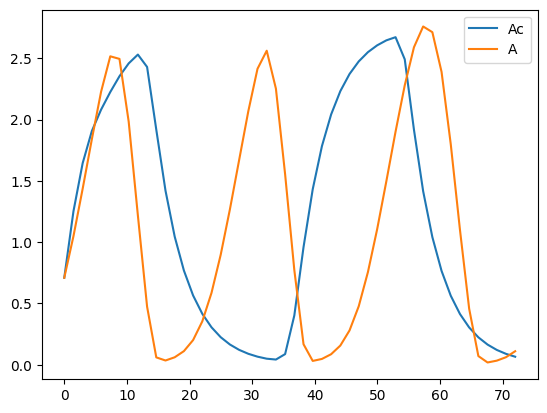

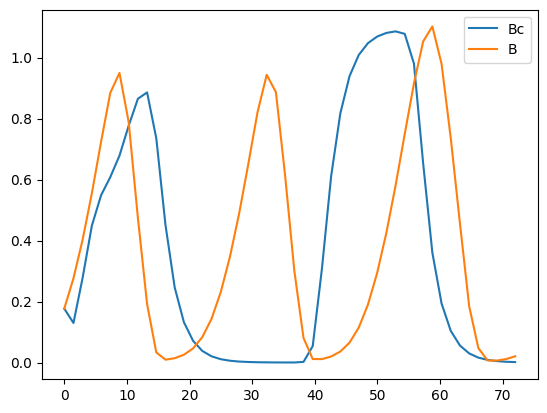

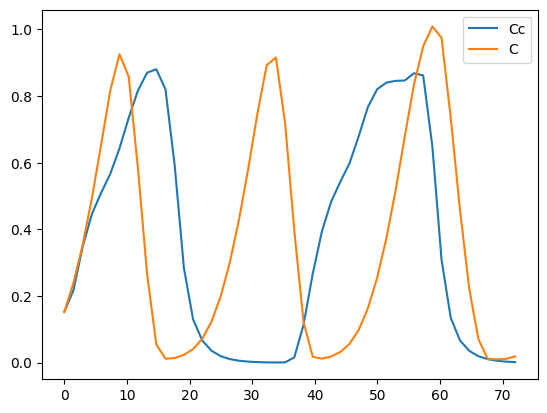

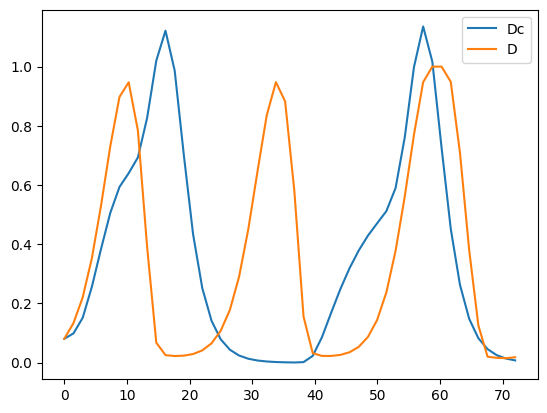

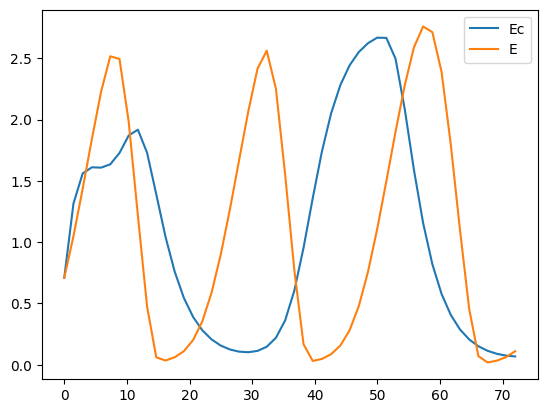

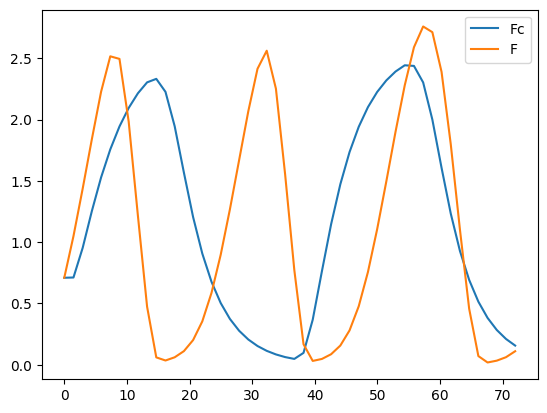

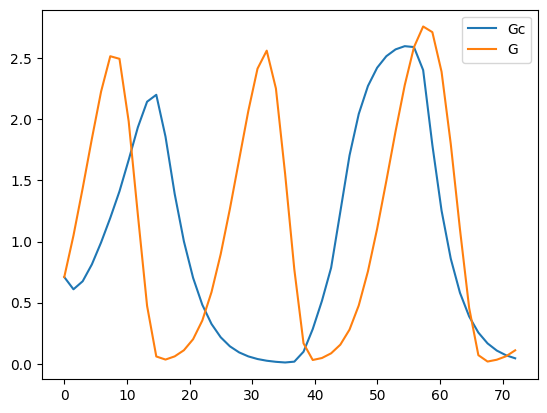

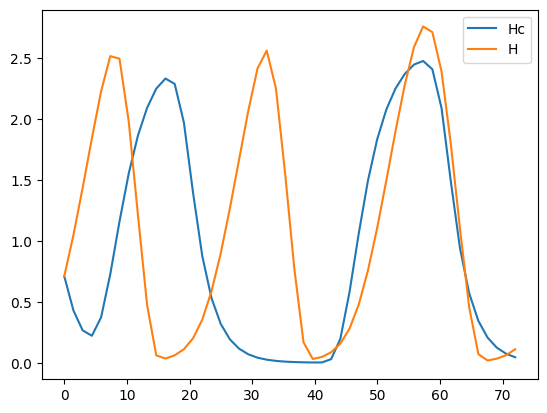

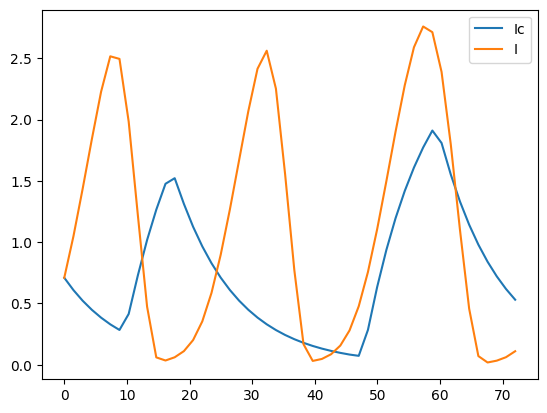

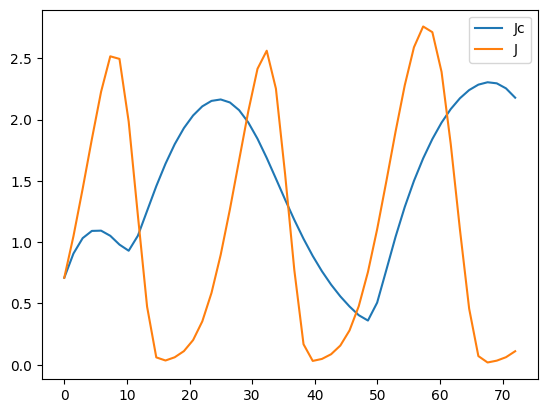

373.49952315081435

In [4]:
diferenca_teste()

In [1]:
import matplotlib.pyplot as plt
import copy
import random as r
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib


#Leitura do arquivo com os pontos de expressão gênica
arquivo = open("./../Data/GRN10_DATA.txt", 'r')

x = []
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []

for linha in arquivo:
    elementos = linha.split()
    x.append(float(elementos[0].strip()))
    A.append(float(elementos[1].strip()))
    B.append(float(elementos[2].strip()))
    C.append(float(elementos[3].strip()))
    D.append(float(elementos[4].strip()))
    E.append(float(elementos[5].strip()))
    F.append(float(elementos[6].strip()))
    G.append(float(elementos[7].strip()))
    H.append(float(elementos[8].strip()))
    I.append(float(elementos[9].strip()))
    J.append(float(elementos[10].strip()))


#Valores máximos da expressão gênica de cada espécie
maximo_A = max(A)
maximo_B = max(B)
maximo_C = max(C)
maximo_D = max(D)
maximo_E = max(E)
maximo_F = max(F)
maximo_G = max(G)
maximo_H = max(H)
maximo_I = max(I)
maximo_J = max(J)


#Condições iniciais da EDO
Y0 = []
Y0.append(A[0])
Y0.append(B[0])
Y0.append(C[0])
Y0.append(D[0])
Y0.append(E[0])
Y0.append(F[0])
Y0.append(G[0])
Y0.append(H[0])
Y0.append(I[0])
Y0.append(J[0])

#Configuração do Indivíduo e range de parâmetros
IND_SIZE = 40#Tamanho do indivíduo (quantidade de coeficientes)
MIN_K = 0.1#Menor valor que K pode assumir
MAX_K = 1#Maior valor que K pode assumir
MIN_N = 1#Menor valor que N pode assumir
MAX_N = 25#Maior valor que N pode assumir
MIN_TAU = 0.1#Menor valor que TAU pode assumir
MAX_TAU = 5#Maior valor que TAU pode assumir
MIN_STRATEGY = 0.1 #Menor valor que a estratégia pode assumir
MAX_STRATEGY = 10#Maior valor que a estratégia pode assumir
TAU_SIZE = 10
N_SIZE = 15
K_SIZE = 15
#COMPOSIÇÃO DO INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]


dobra_pontos = copy.deepcopy(x)
POPULACAO = []
APTIDAO = []


LAMBDA_FILHOS = []
APTIDAO_FILHOS = []


#Função de integração numérica - cada ydot é uma EDO de uma espécie 
def twoBody(y, t, tauA, kAJ, nAJ, tauB, kBE, nBE, tauC, kCB, nCB, kCF, nCF, kCA, nCA, tauD, kDF, nDF, tauE, kEJ, nEJ, tauF, kFA, nFA, tauG, kGB, nGB, kGF, nGF, kGA, nGA, tauH, kHF, nHF, tauI, kIG, nIG, kIH, nIH, tauJ, kJI, nJI):
    ydot = np.empty((10,))

    ydot[0] = ((1-pow(y[9]/maximo_J,nAJ)/(pow(y[9]/maximo_J,nAJ)+pow(kAJ,nAJ)))-(y[0]/maximo_A)) / tauA

    ydot[1] = (pow(y[4]/maximo_E,nBE)/(pow(y[4]/maximo_E,nBE)+pow(kBE,nBE))-(y[1]/maximo_B)) / tauB

    ydot[2] = (pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB))*(1-pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF)))*(1-pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA)))+(1-pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB)))*pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF))*(1-pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA)))+(1-pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB)))*(1-pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF)))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))+pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB))*(1-pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF)))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))+(1-pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB)))*pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))+pow(y[1]/maximo_B,nCB)/(pow(y[1]/maximo_B,nCB)+pow(kCB,nCB))*pow(y[5]/maximo_F,nCF)/(pow(y[5]/maximo_F,nCF)+pow(kCF,nCF))*pow(y[0]/maximo_A,nCA)/(pow(y[0]/maximo_A,nCA)+pow(kCA,nCA))-(y[2]/maximo_C)) / tauC

    ydot[3] = (pow(y[5]/maximo_F,nDF)/(pow(y[5]/maximo_F,nDF)+pow(kDF,nDF))-(y[3]/maximo_D)) / tauD

    ydot[4] = (1-pow(y[9]/maximo_J,nEJ)/(pow(y[9]/maximo_J,nEJ)+pow(kEJ,nEJ))-(y[4]/maximo_E)) / tauE

    ydot[5] = (pow(y[0]/maximo_A,nFA)/(pow(y[0]/maximo_A,nFA)+pow(kFA,nFA))-(y[5]/maximo_F)) / tauF

    ydot[6] = (pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB))*(1-pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF)))*(1-pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA)))+(1-pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB)))*pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF))*(1-pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA)))+(1-pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB)))*(1-pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF)))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))+pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB))*(1-pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF)))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))+(1-pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB)))*pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))+pow(y[1]/maximo_B,nGB)/(pow(y[1]/maximo_B,nGB)+pow(kGB,nGB))*pow(y[5]/maximo_F,nGF)/(pow(y[5]/maximo_F,nGF)+pow(kGF,nGF))*pow(y[0]/maximo_A,nGA)/(pow(y[0]/maximo_A,nGA)+pow(kGA,nGA))-(y[6]/maximo_G)) / tauG

    ydot[7] = (pow(y[5]/maximo_F,nHF)/(pow(y[5]/maximo_F,nHF)+pow(kHF,nHF))-(y[7]/maximo_H)) / tauH

    ydot[8] = (pow(y[6]/maximo_G,nIG)/(pow(y[6]/maximo_G,nIG)+pow(kIG,nIG))*pow(y[7]/maximo_H,nIH)/(pow(y[7]/maximo_H,nIH)+pow(kIH,nIH))-(y[8]/maximo_I)) / tauI

    ydot[9] = (pow(y[8]/maximo_I,nJI)/(pow(y[8]/maximo_I,nJI)+pow(kJI,nJI))-(y[9]/maximo_J)) / tauJ

    return ydot

def organiza_pontos(solucao):
    pA = []
    pB = []
    pC = []
    pD = []
    pE = []
    pF = []
    pG = []
    pH = []
    pI = []
    pJ = []
    for pontos in range(len(solucao)):
        if pontos % 2 == 0 or pontos % 2 == 1:
            pA.append(solucao[pontos][0])
            pB.append(solucao[pontos][1])
            pC.append(solucao[pontos][2])
            pD.append(solucao[pontos][3])
            pE.append(solucao[pontos][4])
            pF.append(solucao[pontos][5])
            pG.append(solucao[pontos][6])
            pH.append(solucao[pontos][7])
            pI.append(solucao[pontos][8])
            pJ.append(solucao[pontos][9])
    return pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ



def calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ):
    difA = 0
    difB = 0
    difC = 0
    difD = 0
    difE = 0
    difF = 0
    difG = 0
    difH = 0
    difI = 0
    difJ = 0
    pAl = []
    pBl = []
    pCl = []
    pDl = []
    pEl = []
    pFl = []
    pGl = []
    pHl = []
    pIl = []
    pJl = []
     
    for elemento in range(len(pA)):
        dif = abs(A[elemento] - pA[elemento])
        difA += dif
    for elemento in range(len(pB)):
        dif = abs(B[elemento] - pB[elemento])
        difB += dif
    for elemento in range(len(pC)):
        dif = abs(C[elemento] - pC[elemento])
        difC += dif
    for elemento in range(len(pD)):
        dif = abs(D[elemento] - pD[elemento])
        difD += dif
    for elemento in range(len(pE)):
        dif = abs(E[elemento] - pE[elemento])
        difE += dif
    for elemento in range(len(pF)):
        dif = abs(F[elemento] - pF[elemento])
        difF += dif
    for elemento in range(len(pG)):
        dif = abs(G[elemento] - pG[elemento])
        difG += dif
    for elemento in range(len(pH)):
        dif = abs(H[elemento] - pH[elemento])
        difH += dif
    for elemento in range(len(pI)):
        dif = abs(I[elemento] - pI[elemento])
        difI += dif
    for elemento in range(len(pJ)):
        dif = abs(J[elemento] - pJ[elemento])
        difJ += dif        
    
    difTotal = difA + difB + difC + difD + difE + difF + difG + difH + difI + difJ

    return difTotal


def cria_individuo(ind_size, tau_size, n_size, k_size, min_tau, max_tau, min_n, max_n, min_k, max_k, min_strategy, max_strategy):
    ind = []
    for i in range(tau_size):
        ind.append(r.uniform(min_tau, max_tau))
    for i in range(k_size):
        ind.append(r.uniform(min_k, max_k))
    for i in range(n_size):
        ind.append(r.uniform(min_n, max_n))
    for i in range(ind_size):
        ind.append(r.uniform(min_strategy, max_strategy))
    return ind


def mutESLogNormal(ind, c, indpb):
    size = IND_SIZE
    t = c / math.sqrt(2. * math.sqrt(size))
    t0 = c / math.sqrt(2. * size)
    n = r.gauss(0, 1)
    t0_n = t0 * n
    for indx in range(size):
        #INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]
        if r.random() < indpb:
            if indx == 0 or indx == 1 or indx == 2 or indx == 3 or indx == 4 or indx == 5 or indx == 6 or indx == 7 or indx == 8 or indx == 9: #EH TAU
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                while ind[indx] < MIN_TAU or ind[indx] > MAX_TAU:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    
            if indx == 10 or indx == 11 or indx == 12 or indx == 13 or indx == 14 or indx == 15 or indx == 16 or indx == 17 or indx == 18 or indx == 19 or indx == 20 or indx == 21 or indx == 22 or indx == 23 or indx == 24: #EH K
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))                
                while ind[indx] < MIN_K or ind[indx] > MAX_K:
                    #print("entrou restrição K")
                    #print(ind[indx])
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    #print("modificação K")
                    #print(ind[indx])
                
            if indx == 25 or indx == 26 or indx == 27 or indx == 28 or indx == 29 or indx == 30 or indx == 31 or indx == 32 or indx == 33 or indx == 34 or indx == 35 or indx == 36 or indx == 37 or indx == 38 or indx == 39: #EH N
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])                
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))                
                while ind[indx] < MIN_N or ind[indx] > MAX_N:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)                        
    return ind

def varOr(populacao, lambda_f):
    offspring = []
    for descendencia in range(lambda_f):
        ind = copy.deepcopy(r.choice(populacao))
        ind_mutado = mutESLogNormal(ind, 1, 0.03)
        offspring.append(ind_mutado)
    return offspring
    
def selRandom(individuals, k):
    selecionados = []
    for i in range(k):
        selecionados.append(r.choice(individuals))
    return selecionados

def selTournament(individuals, k, tournsize):
    chosen = []
    chosen_apt = []
    for i in range(k):
        aspirants = selRandom(individuals, tournsize)
        aptidoes = []
        for individuos in range(len(aspirants)):
            individuo_atual = aspirants[individuos]
            for descendencias in range(len(individuals)):
                if individuo_atual == individuals[descendencias]:
                    aptidoes.append(APTIDAO_FILHOS[descendencias])
                    break
        menor_erro = min(aptidoes)
        chosen_apt.append(menor_erro)
        for j in range(len(aptidoes)):
            if aptidoes[j] == menor_erro:
                indice_menor_erro = j
        #print(aptidoes)
        #print(indice_menor_erro)
        chosen.append(aspirants[indice_menor_erro])
    return chosen, chosen_apt     
    
def main():
    r.seed(2)
    MU, LAMBDA = 10, 50
    for qtd_progenitores in range(MU):
        POPULACAO.append(cria_individuo(IND_SIZE, TAU_SIZE, N_SIZE, K_SIZE, MIN_TAU, MAX_TAU, MIN_N, MAX_N, MIN_K, MAX_K, MIN_STRATEGY, MAX_STRATEGY))
    for qtd_progenitores in range(MU):
        #INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]
        ind_atual = POPULACAO[qtd_progenitores]
        tauA = ind_atual[0]
        tauB = ind_atual[1]
        tauC = ind_atual[2]
        tauD = ind_atual[3]
        tauE = ind_atual[4]
        tauF = ind_atual[5]
        tauG = ind_atual[6]
        tauH = ind_atual[7]
        tauI = ind_atual[8]
        tauJ = ind_atual[9]
        kAJ = ind_atual[10]
        kBE = ind_atual[11]
        kCB = ind_atual[12]
        kCF = ind_atual[13]
        kCA = ind_atual[14]
        kDF = ind_atual[15]
        kEJ = ind_atual[16]
        kFA = ind_atual[17]
        kGB = ind_atual[18]
        kGF = ind_atual[19]
        kGA = ind_atual[20]
        kHF = ind_atual[21]
        kIG = ind_atual[22]
        kIH = ind_atual[23]
        kJI = ind_atual[24]
        nAJ = ind_atual[25]
        nBE = ind_atual[26]
        nCB = ind_atual[27]
        nCF = ind_atual[28]
        nCA = ind_atual[29]
        nDF = ind_atual[30]
        nEJ = ind_atual[31]
        nFA = ind_atual[32]
        nGB = ind_atual[33]
        nGF = ind_atual[34]
        nGA = ind_atual[35]
        nHF = ind_atual[36]
        nIG = ind_atual[37]
        nIH = ind_atual[38]
        nJI = ind_atual[39]
        
        solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
        pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)
        APTIDAO.append(calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ))

    for gen in range(10000): #Início do processo geracional
        #Varia Populacao (varOr)
        offspring = varOr(POPULACAO, LAMBDA)
        #Avalia Descendência
        APTIDAO_FILHOS.clear()
        for qtd_descendencia in range(LAMBDA):
            ind_atual = offspring[qtd_descendencia]
            tauA = ind_atual[0]
            tauB = ind_atual[1]
            tauC = ind_atual[2]
            tauD = ind_atual[3]
            tauE = ind_atual[4]
            tauF = ind_atual[5]
            tauG = ind_atual[6]
            tauH = ind_atual[7]
            tauI = ind_atual[8]
            tauJ = ind_atual[9]
            kAJ = ind_atual[10]
            kBE = ind_atual[11]
            kCB = ind_atual[12]
            kCF = ind_atual[13]
            kCA = ind_atual[14]
            kDF = ind_atual[15]
            kEJ = ind_atual[16]
            kFA = ind_atual[17]
            kGB = ind_atual[18]
            kGF = ind_atual[19]
            kGA = ind_atual[20]
            kHF = ind_atual[21]
            kIG = ind_atual[22]
            kIH = ind_atual[23]
            kJI = ind_atual[24]
            nAJ = ind_atual[25]
            nBE = ind_atual[26]
            nCB = ind_atual[27]
            nCF = ind_atual[28]
            nCA = ind_atual[29]
            nDF = ind_atual[30]
            nEJ = ind_atual[31]
            nFA = ind_atual[32]
            nGB = ind_atual[33]
            nGF = ind_atual[34]
            nGA = ind_atual[35]
            nHF = ind_atual[36]
            nIG = ind_atual[37]
            nIH = ind_atual[38]
            nJI = ind_atual[39]
            
            solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
            pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)
            diferenca = calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ)
            if math.isnan(diferenca):
                print("AQUI")
                print(kA)
                print(kB)
                print(kC)
                print(kD)
                print(kE)
                print("------- TAU")
                print(tauA)
                print(tauB)
                print(tauC)
                print(tauD)
                print(tauE)
                print("------- N")
                print(nA)
                print(nB)
                print(nC)
                print(nD)
                print(nE)
                print("------- Ps")
                print(pA)
                print(pB)
                print(pC)
                print(pD)
                print(pE)
            else:
                APTIDAO_FILHOS.append(diferenca)
        menor_valor = min(APTIDAO)
        for item in range(len(APTIDAO)):
            if menor_valor == APTIDAO[item]:
                indice_menor = item                
        #Seleciona população para a geração seguinte
        novos_pais, novas_aptidoes = selTournament(offspring, MU, 3)

        remove = r.randint(0, len(novos_pais)-1)
        novos_pais.pop(remove)
        novas_aptidoes.pop(remove)
        novos_pais.append(POPULACAO[indice_menor])
        novas_aptidoes.append(menor_valor)

        POPULACAO.clear()
        for elemento in novos_pais:
            POPULACAO.append(elemento)


        APTIDAO.clear()
        for elemento in novas_aptidoes:
            APTIDAO.append(elemento)

        if gen % 10 == 0:
            print("Geração: ", gen)
            print("Aptidoes: ", APTIDAO)
            
    menor_valor = min(APTIDAO)
    for item in range(len(APTIDAO)):
        if menor_valor == APTIDAO[item]:
            indice_menor = item

def diferenca_teste():
    ind_atual = [1.7295845806305183, 2.137872287393499, 0.8115630215517095, 0.10929121464989712, 1.2304053798528052, 1.7835884292159854, 1.1403239306934438, 1.043105485209666, 3.470329119244101, 3.2051652257615313, 0.4520916163461513, 0.5569045731322917, 0.998501872972112, 0.7764522466015744, 0.714044959002351, 0.6614355144532335, 0.419715052899603, 0.4802077471812636, 0.6590226292521215, 0.9992832033566835, 0.8475066983404798, 0.6149072199046399, 0.5546829989124753, 0.45619763535135, 0.17160901721122174, 20.31025928317277, 9.993535167046062, 24.812027109545195, 12.380493877679761, 2.034178595889051, 2.035733440415823, 6.524727690407622, 4.184658746008267, 7.218593487138588, 24.628047437928384, 2.2001040611019183, 7.511741677486343, 21.739608192413545, 20.413495907981233, 3.5353856382635227, 2.2810456094511795, 7.551791888564684, 1.318711233661558, 3.8481834040699017, 0.4790390756128461, 2.750189500079153, 1.5747324187845937, 3.976944214359518, 4.93437509566884, 7.581591017750097, 5.6689413033497615, 2.7723613211220806, 1.216541601270928, 0.7128563891690599, 1.562429197851857, 4.725479425719405, 1.0254430398309093, 1.6301823327158054, 3.704157616574442, 1.7149767325600582, 1.7639762564896415, 2.589737516439637, 0.9643323063462832, 2.5168025612195613, 7.048318160466932, 1.0536450866019669, 5.315804391363255, 2.4740860987818403, 0.3721931811917861, 0.8447572048127299, 1.1434851937321493, 0.957646192168535, 0.9844917211052004, 3.839638812272926, 3.774733074267533, 3.598973618945015, 1.1689344148649397, 0.8120452851483856, 1.2939472410757618, 3.489103624812642]

    tauA = ind_atual[0]
    tauB = ind_atual[1]
    tauC = ind_atual[2]
    tauD = ind_atual[3]
    tauE = ind_atual[4]
    tauF = ind_atual[5]
    tauG = ind_atual[6]
    tauH = ind_atual[7]
    tauI = ind_atual[8]
    tauJ = ind_atual[9]
    kAJ = ind_atual[10]
    kBE = ind_atual[11]
    kCB = ind_atual[12]
    kCF = ind_atual[13]
    kCA = ind_atual[14]
    kDF = ind_atual[15]
    kEJ = ind_atual[16]
    kFA = ind_atual[17]
    kGB = ind_atual[18]
    kGF = ind_atual[19]
    kGA = ind_atual[20]
    kHF = ind_atual[21]
    kIG = ind_atual[22]
    kIH = ind_atual[23]
    kJI = ind_atual[24]
    nAJ = ind_atual[25]
    nBE = ind_atual[26]
    nCB = ind_atual[27]
    nCF = ind_atual[28]
    nCA = ind_atual[29]
    nDF = ind_atual[30]
    nEJ = ind_atual[31]
    nFA = ind_atual[32]
    nGB = ind_atual[33]
    nGF = ind_atual[34]
    nGA = ind_atual[35]
    nHF = ind_atual[36]
    nIG = ind_atual[37]
    nIH = ind_atual[38]
    nJI = ind_atual[39]
    
    solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
    pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)
    #diferenca = calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ)

    plt.plot(x, pA)
    plt.plot(x, A)
    plt.legend(['Ac', 'A'])
    plt.savefig("A.eps", dpi=300)
    plt.show()
    plt.plot(x, pB)
    plt.plot(x, B)
    plt.legend(['Bc', 'B'])
    plt.savefig("B.eps", dpi=300)
    plt.show()
    plt.plot(x, pC)
    plt.plot(x, C)
    plt.legend(['Cc', 'C'])
    plt.savefig("C.eps", dpi=300)
    plt.show()
    plt.plot(x, pD)
    plt.plot(x, D)
    plt.legend(['Dc', 'D'])
    plt.savefig("D.eps", dpi=300)
    plt.show()
    plt.plot(x, pE)
    plt.plot(x, E)
    plt.legend(['Ec', 'E'])
    plt.savefig("E.eps", dpi=300)
    plt.show()
    plt.plot(x, pF)
    plt.plot(x, F)
    plt.legend(['Fc', 'F'])
    plt.savefig("F.eps", dpi=300)
    plt.show()
    plt.plot(x, pG)
    plt.plot(x, G)
    plt.legend(['Gc', 'G'])
    plt.savefig("G.eps", dpi=300)
    plt.show()
    plt.plot(x, pH)
    plt.plot(x, H)
    plt.legend(['Hc', 'H'])
    plt.savefig("H.eps", dpi=300)
    plt.show()
    plt.plot(x, pI)
    plt.plot(x, I)
    plt.legend(['Ic', 'I'])
    plt.savefig("I.eps", dpi=300)
    plt.show()
    plt.plot(x, pJ)
    plt.plot(x, J)
    plt.legend(['Jc', 'J'])
    plt.savefig("J.eps", dpi=300)
    plt.show()    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


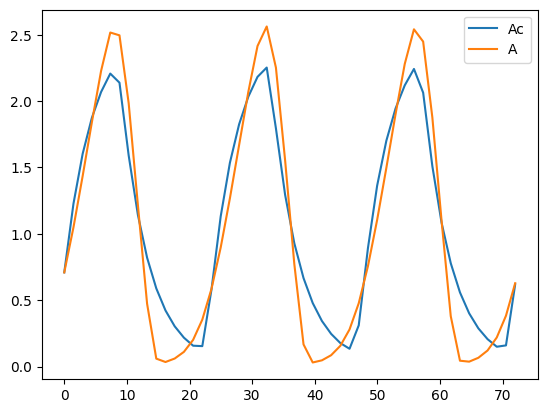

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


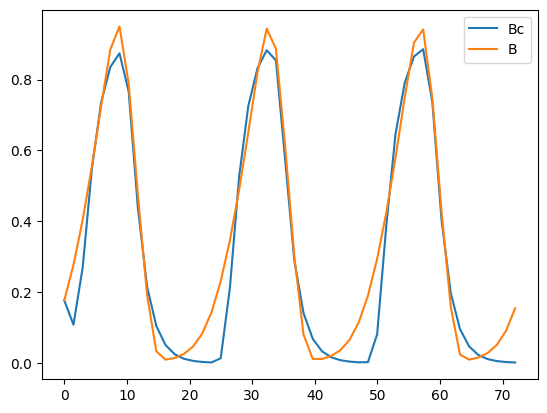

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


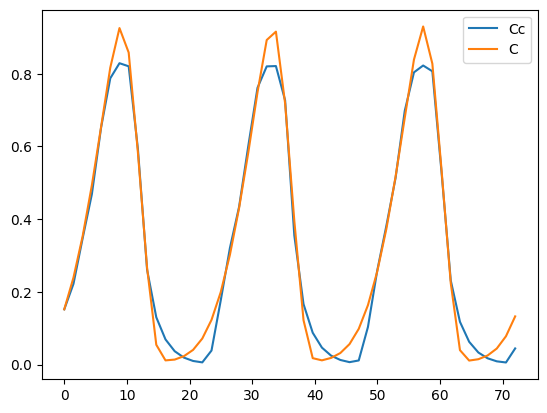

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


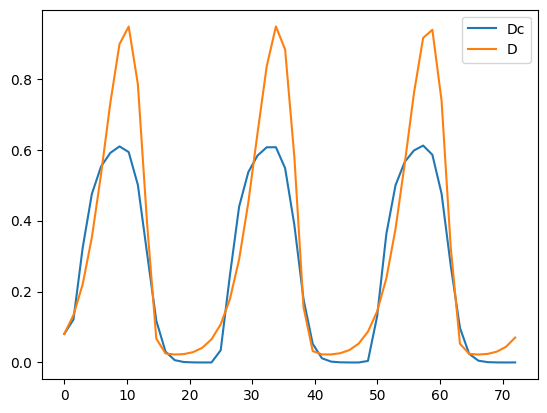

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


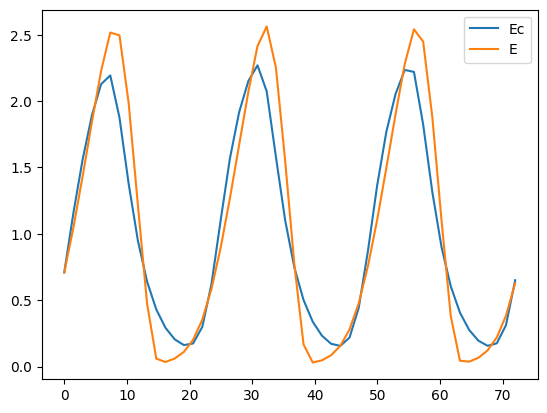

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


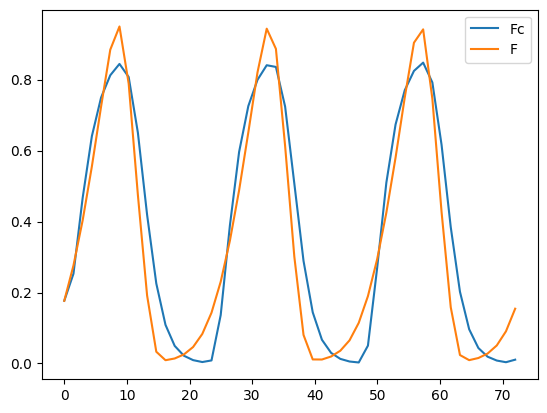

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


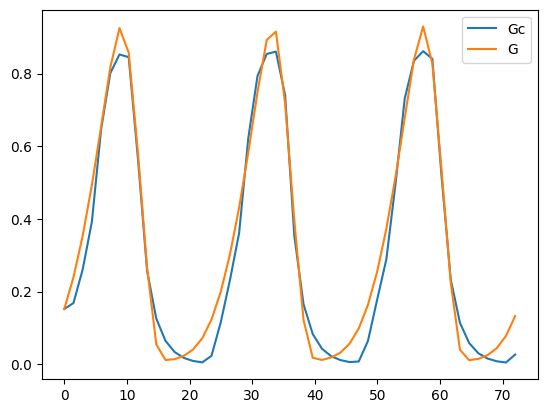

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


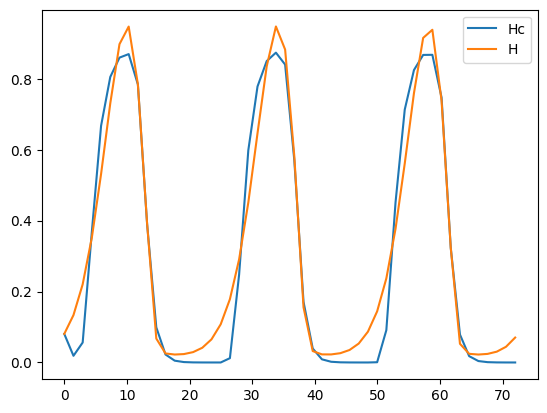

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


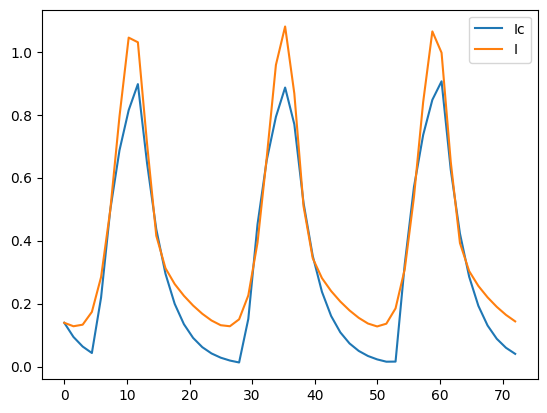

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


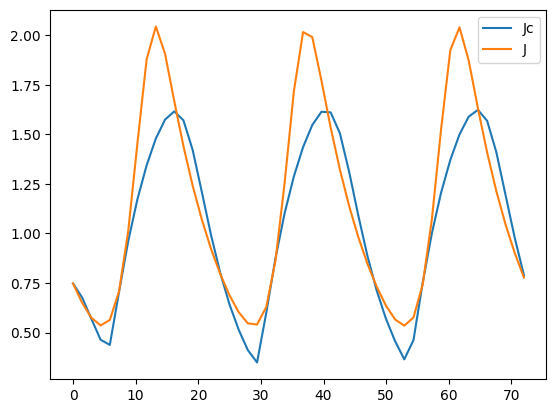

In [2]:
diferenca_teste()